## Machine Learning
# Tarea 1 : Problema de Clasificación y de Regresión Lineal
---
__PROFESOR : Rodrigo Hernández__

__ALUMNOS : Roy Barrera - José Pérez__

---

# CLASIFICADORES

Escoger un problema abordable mediante el diseño, implementación y validación de algoritmos de aprendizaje supervisado de clasificación. 

### Contexto

Para el desarrollo del presente trabajo utilizamos los resultados de la __Encuesta de Presupuestos Familiares (EPF)__ de Junio de 2018, disponibilizada por el Instituto Nacional de Estadísticas (INE).

El set de datos a emplear fue previamente preparado en el Jupiter Notebook 01 de Exploración


### Pregunta de Valor

¿ Se puede determinar el nivel de ingresos de una familia, categorizado (Alto, Medio, Bajo), considerando su composición (cantidad de personas que la forma) y su comportamiento de gasto en Alimentacion ?.  


---
### Preparación del Entorno (Librerias)

In [1]:
#Importacion de Librerias

#Manejo de path y carpetas
import os 

#Manejo de Data Frame
import pandas as pd

#Manejo de gráfica
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas.plotting import scatter_matrix

#Magic para graficar dentro del notebook
%matplotlib inline

#Disposición de argumentos de entrada para ML
import numpy as np

#Estadísticos de base
from scipy import stats

#Particiones para muestras
from sklearn.model_selection import train_test_split

#Clasificador Support Vector Machines
from sklearn.svm import SVC

#Métricas de desempeño
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.naive_bayes import GaussianNB

#Modelo de regresión Lineal

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


---
### Carga y desripcion de los Datos

In [2]:
df_t01 = pd.read_csv('Gasto_x_Familia.csv', sep=';', decimal='.')

In [3]:
df_t01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4941 entries, 0 to 4940
Data columns (total 10 columns):
Personas             4941 non-null int64
Gastos               4941 non-null int64
Ingresos             4941 non-null int64
Categoria            4941 non-null object
G1_Alimentacion      4941 non-null float64
G2_Bebidas           4941 non-null float64
G8_Comunicaciones    4941 non-null float64
G9_Recreacion        4941 non-null float64
G10_Educacion        4941 non-null float64
G11_Restaurantes     4941 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 386.1+ KB


---
### Descripción de los datos

In [4]:
df_t02=df_t01.drop(['Gastos','Ingresos','G8_Comunicaciones','G9_Recreacion','G10_Educacion'], axis=1)
df_t02

,Personas,Categoria,G1_Alimentacion,G2_Bebidas,G11_Restaurantes
0,5,1.Bajo,281100.250000,42993.125000,38146.916244
1,4,2.Medio,255973.527878,137113.429554,148733.787228
2,5,1.Bajo,202343.931967,307.170378,24680.730814
3,2,1.Bajo,113543.777348,663.321978,11831.470055
4,1,1.Bajo,15000.000000,14100.000000,46260.869565
5,4,2.Medio,467673.750000,20324.375000,204212.500000
6,3,3.Alto,356125.170050,152.002639,230408.018736
7,4,3.Alto,171942.227133,128298.666504,420299.254747
8,3,2.Medio,184402.468414,27877.266357,64004.667343
9,4,2.Medio,471096.042965,103929.885301,184004.261026


In [5]:
df_t02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4941 entries, 0 to 4940
Data columns (total 5 columns):
Personas            4941 non-null int64
Categoria           4941 non-null object
G1_Alimentacion     4941 non-null float64
G2_Bebidas          4941 non-null float64
G11_Restaurantes    4941 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 193.1+ KB


In [6]:
df_t02.describe()

,Personas,G1_Alimentacion,G2_Bebidas,G11_Restaurantes
count,4941.000000,4.941000e+03,4941.000000,4.941000e+03
mean,3.970451,2.749368e+05,30510.643128,1.087676e+05
std,1.548781,1.785312e+05,42820.808602,1.499305e+05
min,1.000000,1.937500e+03,3.216987,3.747312e+01
25%,3.000000,1.532214e+05,5000.000000,2.179672e+04
50%,4.000000,2.376860e+05,15684.408430,6.066429e+04
75%,5.000000,3.550237e+05,39679.998779,1.339603e+05
max,17.000000,2.407691e+06,517805.942127,2.536041e+06


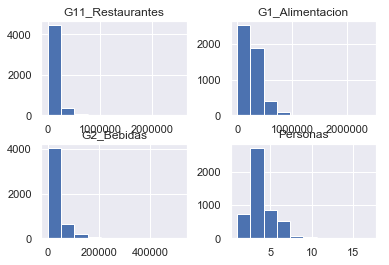

In [7]:
df_t02.drop(['Categoria'], axis=1).hist()
plt.show()

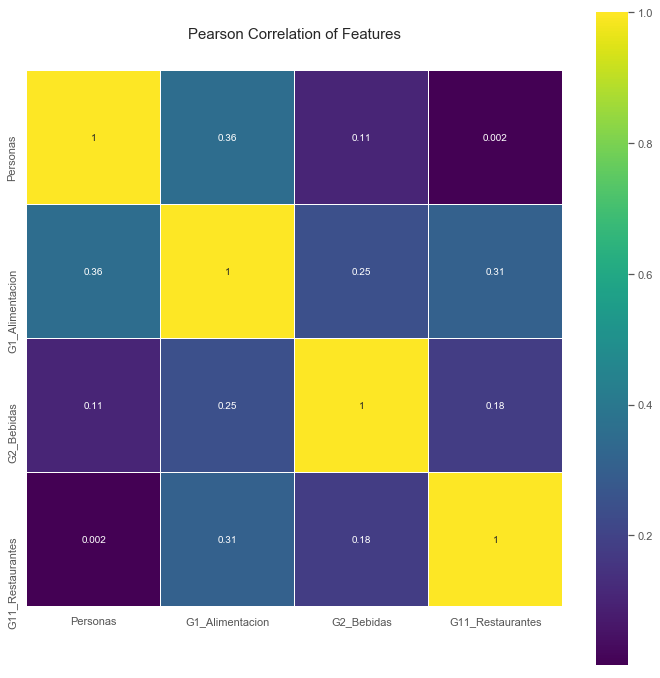

In [8]:
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df_t02.drop('Categoria', axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

---
### Gráfico de matriz

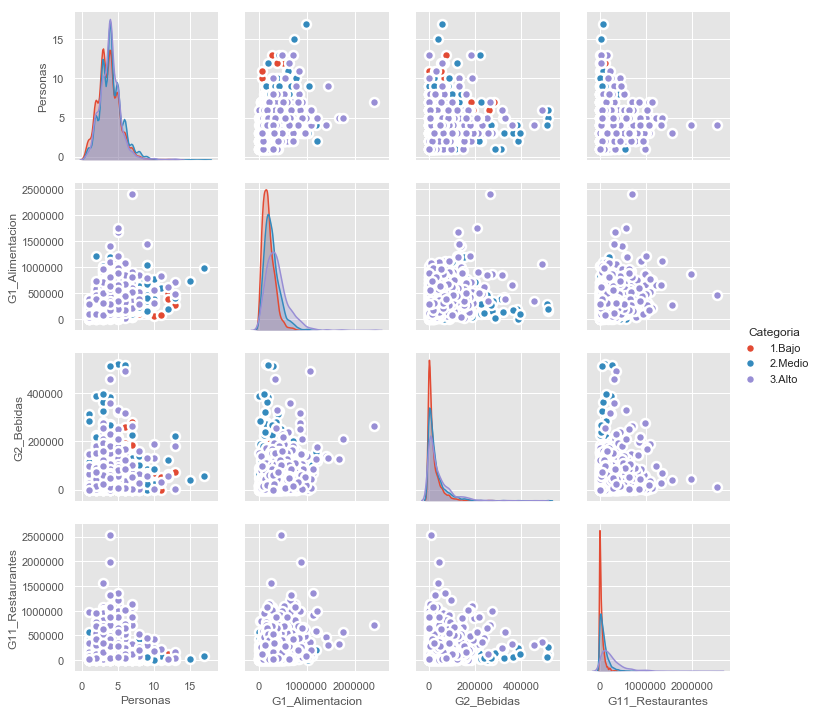

In [9]:
sns.pairplot(df_t02, kind="scatter", hue="Categoria", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [10]:
import time
import warnings; 
warnings.simplefilter('ignore')

tot_total   = df_t02.shape[0]  # cantidad de datos del dataframe
particiones = 10
tot_grupo   = tot_total // particiones

model_l = SVC(kernel = 'linear') 
model_r = SVC(kernel='rbf', gamma=5)
model_s = SVC(kernel ='sigmoid' ) 
#model_p = SVC(kernel ='poly', cache_size=2048, gamma='auto' ) 

gnb = GaussianNB()


for iteracion in range(particiones):    # 0,1,2,3,...(particiones-1)
    
    desde = iteracion * tot_grupo    
    hasta = desde + tot_grupo
    
    if iteracion == ( particiones - 1 ):
        hasta = tot_total
    
    y=df_t02.loc[desde:hasta].Categoria.astype('category')
    x=df_t02.loc[desde:hasta].drop('Categoria', axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)

    print (" ")
    print ("==========================================================================================") 
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), "Iteracion                :", (iteracion +1) )
    print ("                     Desde Fila               :", desde)
    print ("                     Hasta Fila               :", hasta)
    print ("                     Tamaño de la partición   :", x.shape)
    print ("                     Tamaño del entrenamiento :", x_train.shape)
    print ("                     Tamaño del testing       :", x_test.shape)
    print ("------------------------------------------------------------------------------------------")
    print (" ")
    
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), "SVM con Kernel: LINEAL")

    #entrenamiento
    model_l.fit(x_train, y_train)  # a la maquina le pasa los parametro 
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'modelo entrenado!')
    
    #prediccion
    y_pred = model_l.predict(x_test)  # le pide a la maquina que prediga segun los test
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'prediccion realizada!')
    
    #validacion 
    print (confusion_matrix(y_test,y_pred))   
    print (classification_report(y_test,y_pred))
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'modelo evaluado!')

    print (" ") 
    print ("------------------------------------------------------------------------------------------")
    print (" ") 

    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), "SVM con Kernel: RADIAL ")

    #entrenamiento
    model_r.fit(x_train, y_train)  # a la maquina le pasa los parametro 
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'modelo entrenado!')

    #prediccion
    y_pred = model_r.predict(x_test)  # le pide a la maquina que prediga segun los test
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'prediccion realizada!')
        
    #validacion 
    print(confusion_matrix(y_test,y_pred))   
    print(classification_report(y_test,y_pred))
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'modelo evaluado!')

    print (" ") 
    print ("------------------------------------------------------------------------------------------")
    print (" ") 
    
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), "SVM con Kernel: SIGMOID ")

    #entrenamiento
    model_s.fit(x_train, y_train)  # a la maquina le pasa los parametro 
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'modelo entrenado!')
        
    #prediccion
    y_pred = model_s.predict(x_test)  # le pide a la maquina que prediga segun los test
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'prediccion realizada!')
        
    #validacion 
    print(confusion_matrix(y_test,y_pred))   
    print(classification_report(y_test,y_pred))
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'modelo evaluado!')

    print (" ") 
    print ("------------------------------------------------------------------------------------------")
    print (" ") 
    
    #print (">>", time.strftime("%d/%m/%y %H:%M:%S"), "SVM con Kernel: POLY ")

    #entrenamiento
    #model_p.fit(x_train, y_train)  # a la maquina le pasa los parametro 
    #print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'modelo entrenado!')
        
    #prediccion
    #y_pred = model_p.predict(x_test)  # le pide a la maquina que prediga segun los test
    #print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'prediccion realizada!')
        
    #validacion 
    #print(confusion_matrix(y_test,y_pred))   
    #print(classification_report(y_test,y_pred))
    #print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'datos validados!')
    #print (" ") 
    #print ("------------------------------------------------------------------------------------------")
    #print (" ") 
    
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), "NAIVE BAYES GAUSSIANO")
    
    #entrenamiento
    gnb.fit(x_train, y_train)
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'modelo entrenado!')

    #prediccion
    y_pred = gnb.predict(x_test)  # le pide a la maquina que prediga segun los test
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'prediccion realizada!')
        
    print('Precisión en el set de Entrenamiento: {:.2f}'.format(gnb.score(x_train, y_train)))
    print('Precisión en el set de Test: {:.2f}'.format(gnb.score(x_test, y_test)))
        
    #validacion 
    print(confusion_matrix(y_test,y_pred))   
    print(classification_report(y_test,y_pred))    
    print (">>", time.strftime("%d/%m/%y %H:%M:%S"), 'modelo evaluado!')

    print (" ") 
    

print("==========================================================================================") 
print (">>", time.strftime("%d/%m/%y %H:%M:%S"), "Fin")


 
>> 14/10/19 15:07:24 Iteracion                : 1
                     Desde Fila               : 0
                     Hasta Fila               : 494
                     Tamaño de la partición   : (495, 4)
                     Tamaño del entrenamiento : (346, 4)
                     Tamaño del testing       : (149, 4)
------------------------------------------------------------------------------------------
 
>> 14/10/19 15:07:24 SVM con Kernel: LINEAL
>> 14/10/19 15:10:11 modelo entrenado!
>> 14/10/19 15:10:11 prediccion realizada!
[[31 16  1]
 [12 55  7]
 [ 2 13 12]]
              precision    recall  f1-score   support

      1.Bajo       0.69      0.65      0.67        48
     2.Medio       0.65      0.74      0.70        74
      3.Alto       0.60      0.44      0.51        27

   micro avg       0.66      0.66      0.66       149
   macro avg       0.65      0.61      0.62       149
weighted avg       0.66      0.66      0.65       149

>> 14/10/19 15:10:11 modelo evaluado!


>> 14/10/19 15:20:05 modelo entrenado!
>> 14/10/19 15:20:05 prediccion realizada!
[[17 27  0]
 [14 57  5]
 [ 0 18 11]]
              precision    recall  f1-score   support

      1.Bajo       0.55      0.39      0.45        44
     2.Medio       0.56      0.75      0.64        76
      3.Alto       0.69      0.38      0.49        29

   micro avg       0.57      0.57      0.57       149
   macro avg       0.60      0.51      0.53       149
weighted avg       0.58      0.57      0.56       149

>> 14/10/19 15:20:05 modelo evaluado!
 
------------------------------------------------------------------------------------------
 
>> 14/10/19 15:20:05 SVM con Kernel: RADIAL 
>> 14/10/19 15:20:05 modelo entrenado!
>> 14/10/19 15:20:05 prediccion realizada!
[[ 0 44  0]
 [ 0 76  0]
 [ 0 29  0]]
              precision    recall  f1-score   support

      1.Bajo       0.00      0.00      0.00        44
     2.Medio       0.51      1.00      0.68        76
      3.Alto       0.00      0.00      0

>> 14/10/19 15:27:53 modelo entrenado!
>> 14/10/19 15:27:53 prediccion realizada!
[[21 27  0]
 [ 8 65  4]
 [ 2 12 10]]
              precision    recall  f1-score   support

      1.Bajo       0.68      0.44      0.53        48
     2.Medio       0.62      0.84      0.72        77
      3.Alto       0.71      0.42      0.53        24

   micro avg       0.64      0.64      0.64       149
   macro avg       0.67      0.57      0.59       149
weighted avg       0.66      0.64      0.63       149

>> 14/10/19 15:27:53 modelo evaluado!
 
------------------------------------------------------------------------------------------
 
>> 14/10/19 15:27:53 SVM con Kernel: RADIAL 
>> 14/10/19 15:27:53 modelo entrenado!
>> 14/10/19 15:27:53 prediccion realizada!
[[ 0 48  0]
 [ 0 77  0]
 [ 0 24  0]]
              precision    recall  f1-score   support

      1.Bajo       0.00      0.00      0.00        48
     2.Medio       0.52      1.00      0.68        77
      3.Alto       0.00      0.00      0

>> 14/10/19 15:38:21 modelo entrenado!
>> 14/10/19 15:38:21 prediccion realizada!
[[13 35  0]
 [ 9 60  4]
 [ 1 17 10]]
              precision    recall  f1-score   support

      1.Bajo       0.57      0.27      0.37        48
     2.Medio       0.54      0.82      0.65        73
      3.Alto       0.71      0.36      0.48        28

   micro avg       0.56      0.56      0.56       149
   macro avg       0.61      0.48      0.50       149
weighted avg       0.58      0.56      0.53       149

>> 14/10/19 15:38:21 modelo evaluado!
 
------------------------------------------------------------------------------------------
 
>> 14/10/19 15:38:21 SVM con Kernel: RADIAL 
>> 14/10/19 15:38:21 modelo entrenado!
>> 14/10/19 15:38:21 prediccion realizada!
[[ 0 48  0]
 [ 0 73  0]
 [ 0 28  0]]
              precision    recall  f1-score   support

      1.Bajo       0.00      0.00      0.00        48
     2.Medio       0.49      1.00      0.66        73
      3.Alto       0.00      0.00      0

### Comparación.

Se comparan los resultados obtenidos por las modelos entrenados

<img src="ComparaResultados.png">

# Conclusiones

Para el problema de clasificadores, el modelo con Kernel Lineal 
tuvo mejores resultados que los Kernels Radial y Sigmoide.

No fue posible ejecutar completamente el Kernel Poly, por lo cual
no se incluyó en la comparativa.

Comparando este con el modelo Naive Bayes Gaussian, se obtuvieron 
resultados similares, por lo que no se puede concluir que uno sea
mejor que el otro.

